# Introducción a la Teoría de Fourier y Cuadernillos Jupyter 

Renee Hlozek y Jeff McMahon. Traducción por Cristian Vargas

Echaremos un vistazo a lo que las transformadas de Fourier hacen en 1D y 2D. En su forma más simple, una transformada de Fourier en una dimensión toma una función variable en el tiempo, mide los posibles ciclos que contiene y devuelve la amplitud, el desplazamiento y la rotación para todos los ciclos encontrados.

Un Cuadernillo Jupyter consiste en un backend de Python estándar y eficiente con una interfaz basada en web. La interfaz incluye tanto cajas de texto como cajas de código. Las cajas de texto admiten matemáticas en formato LaTeX y la salida del código (tanto texto como gráficos) se almacenan en el documento. Todas las celdas de cuadernillo determinado comparten el mismo espacio de nombres. Este arreglo permite tener un código increíblemente bien documentado que es fácil de leer y mantener.

Para comenzar con esta introducción, primero debemos importar varias librerías de Python.

In [1]:
import matplotlib   #  librería para graficar
import matplotlib.pyplot as plt   # librería para graficar
import cmath as cm  # matemática compleja
import pylab as pl  # para graficar y rutinas numéricas
import numpy as np  # rutinas numéricas
import matplotlib.cm as cmap  ## mapa de color para graficar en 2D

pi2 = cm.pi * 2.0   # una constante útil 2*pi

#La siguiente línea es una "palabra mágica" permite mostrar los gráficos dentro del cuadernillo
#en lugar de forma externa.

%matplotlib inline  


Empezamos escribiendo nuestra propia <a href="https://es.wikipedia.org/wiki/Transformada_de_Fourier_discreta">transformada de Fourier discreta</a>

$$X_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i k n / N}$$


Con cada rutina de transformada de Fourier, asegurate de verificar la normalización y las convenciones de signos.

In [2]:
def fourier(x):
    N = len(x)
    fourier = np.zeros(N,dtype=complex)
    for k in range(N):
        fouriern=0
        for n in range(N):
            fouriern += x[n]*cm.exp(-1j*pi2*k*n/N)
        fourier[k]=fouriern
    return fourier

La transformada de Fourier inversa se define como:

$$X_n = \frac 1 N \sum_{n=0}^{N-1} x_k e^{2\pi i k n / N}$$


In [3]:
def inv_fourier(X):
    N = len(X)
    inv_fourier = np.zeros(N, dtype=complex)
    for n in range(N):
        inv_fourierk=0
        for k in range(N):
            inv_fourierk += X[k]*cm.exp(1j*pi2*n*k/N)
        inv_fourier[n] = inv_fourierk/N
    return inv_fourier

Queremos probar nuestro código insertando una señal de onda sinusoidal y luego comprobaremos que:

    (1) nuestra transformada de Fourier coincide con la transformada rápida de Fourier (Fast Fourier
        Transform o FFT en inglés) desde dentro de numpy
    (2) que si transformamos inversamente la transformada de Fourier ¡recuperamos la onda original!

Primero creamos una señal de onda sinusoidal de entrada:

Parámetros de entrada de la onda sinusoidal:
frecuencia     = 50.0
amplitud       = 50
ángulo de fase = 12


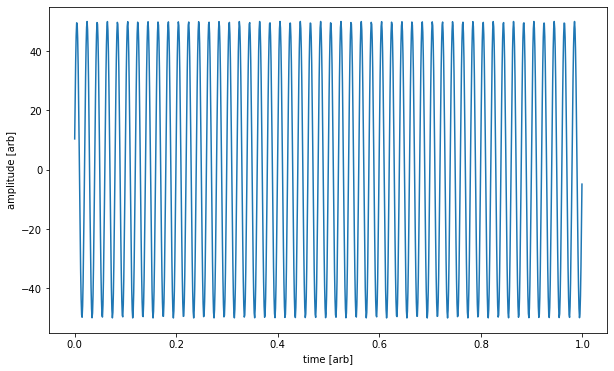

In [4]:
N = 1024 # grados (Numero de muestras)
a = 50  #float(np.random.randint(1, 100))  ## entero aleatorio (amplitud) entre 0 y 100
f = 50. #float(np.random.randint(1, 50))   ## entero aleatorio (frecuencia) entre 0 y 50
p = 12  #float(np.random.randint(0, 360))  ## entero aleatorio (fase) entre 0 y 360

## imprimir los parametros de la onda sinusoidal
print("Parámetros de entrada de la onda sinusoidal:")
print("frecuencia     = " + str(f))
print("amplitud       = " + str(a))
print("ángulo de fase = " + str(p))

## crear un arreglo de una onda sinusoidal pura
t = np.arange(0,N, dtype=complex)/N   ## una variable de tiempo entre 0 y 1
fn = a * np.sin(pi2* f * t + p / 360. * pi2)   ## la onda sinusoidal pura
pl.figure(figsize=(10, 6))  ## Esto redimensiona la figura para que se ajuste a la pantalla
pl.plot(np.real(t),np.real(fn))
pl.xlabel("time [arb]")
pl.ylabel("amplitude [arb]")
pl.show()

A continuación, calculamos la transformada de Fourier utilizando nuestra función de transformada de Fourier y examinamos los resultados.

NOTA: Dada la convención de normalización que hemos adoptado, utilizamos la transformada de Fourier inversa (IFFT) para pasar del dominio temporal al dominio de frecuencia y asegurarnos de obtener una amplitud significativa en nuestros resultados.

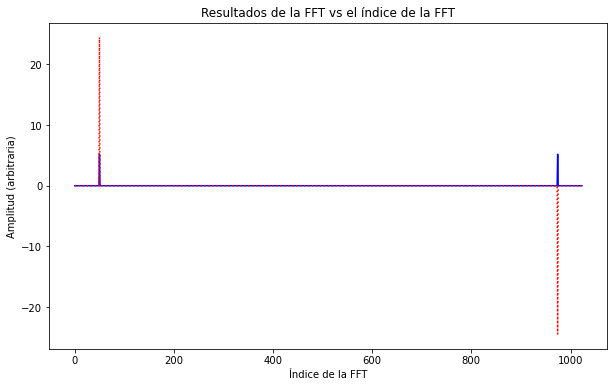

In [5]:
fouriertrans = inv_fourier(fn)  ## IFFT usando nuestro código

pl.figure(figsize=(10, 6)) 
pl.xlabel("Índice de la FFT")
pl.ylabel("Amplitud (arbitraria)")
pl.title("Resultados de la FFT vs el índice de la FFT")
pl.plot((fouriertrans.real),'b',)
pl.plot((fouriertrans.imag),'r:')

Notas:

    (1) La salida de la FFT incluye componentes de frecuencia positivas y negativas (ondas que van hacia la derecha y hacia la izquierda), ya que el algoritmo no puede distinguir estos dos casos.

    (2) La amplitud de las ondas se obtiene a partir de la suma en cuadratura de las partes real e imaginaria (por ejemplo, la magnitud de la FFT compleja).

    (3) La frecuencia cero se encuentra a la izquierda del arreglo, no en el centro. Por lo tanto, debes tener mucho cuidado al interpretar el contenido de frecuencia (el orden quedará claro en la siguiente celda)

A continuación, creamos un arreglo de frecuencias en el mismo esquema de indexación de la FFT. Esto lo hacemos identificando la frecuencia más alta que se puede codificar dentro de nuestro arreglo (ver el teorema de muestreo de Nyquist-Shannon). Esto se llama frecuencia de Nyquist y se calcula como $f_{Nyquist} = 1/T_{muestreo}/2$, donde $T_{muestreo}$ es el tiempo entre muestras.


Frecuencia de Nyquist:  512.0


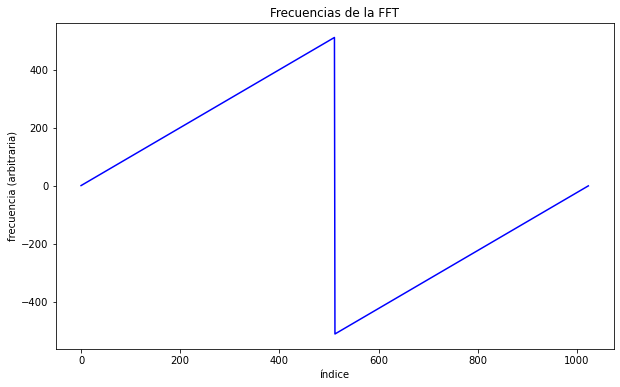

In [6]:
## hacer un arreglo para representar la frecuencia
delta_t = (t[1]-t[0]).real  ## el tamaño de paso para la cuadrícula t
freq_nyquist = 1/delta_t/2.
print("Frecuencia de Nyquist: ", freq_nyquist)


freq = np.roll(np.linspace(-1,1,N)*freq_nyquist,int(N/2))

## graficar el arreglo de frecuencia
pl.figure(figsize=(10, 6))
pl.xlabel("índice")
pl.ylabel("frecuencia (arbitraria)")
pl.title("Frecuencias de la FFT")
pl.plot(freq,'b', label='frec')
pl.plot()
pl.show()

Como era de esperar, la frecuencia cero está a la izquierda y la frecuencia máxima está en el medio. El signo de la frecuencia codifica las ondas que van de derecha a izquierda.

Ahora que tenemos el arreglo de frecuencias, podemos graficar la FFT versus frecuencia e interpretar fácilmente los resultados.

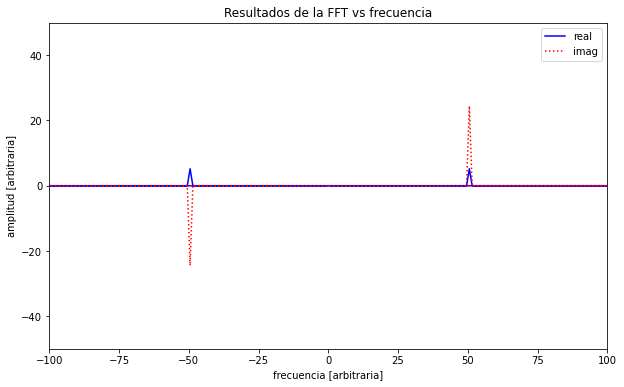

In [7]:
## make a plot of the real and imaginary parts of the FFT
pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frecuencia [arbitraria]")
pl.ylabel("amplitud [arbitraria]")
pl.title("Resultados de la FFT vs frecuencia")
pl.plot(freq,(fouriertrans.real),'b',label='real')
pl.plot(freq,(fouriertrans.imag),'r:', label='imag')
leg = plt.legend(loc='best')
pl.axis([-100,100,-50,50])
pl.show()

<font color='red'>EJERCICIO: </font> Convéncete de que la transformada inversa de Fourier (IFFT) está proporcionando los resultados correctos de amplitud y frecuencia.

A continuación verificamos que la FFT y la iFFT son, de hecho, funciones inversas:

<Figure size 432x288 with 0 Axes>

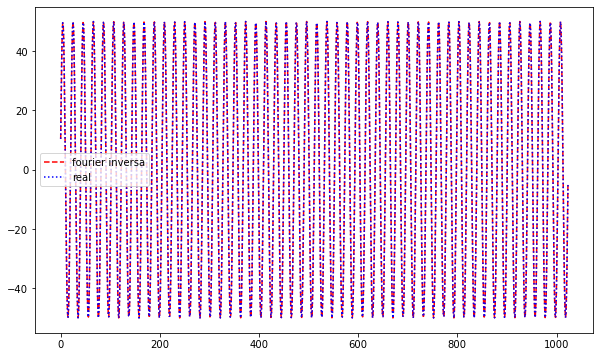

La diferencia máxima entre los resultados: 2.7763169664433386e-11 <- Esto debería ser cero dentro del margen de error de redondeo.


In [8]:
invfouriertrans = fourier(fouriertrans)
pl.clf()
pl.figure(figsize=(10, 6))
pl.plot(np.real(invfouriertrans), 'r--', label='fourier inversa')
pl.plot(np.real(fn), 'b:', label='real')
plt.legend(loc='best')
pl.show()
print("La diferencia máxima entre los resultados:", np.max(np.abs(invfouriertrans - fn)),
      "<- Esto debería ser cero dentro del margen de error de redondeo.")

En el ejercicio final en una dimensión, comprobaremos que la implementación de la FFT en Numpy es idéntica a nuestra implementación.

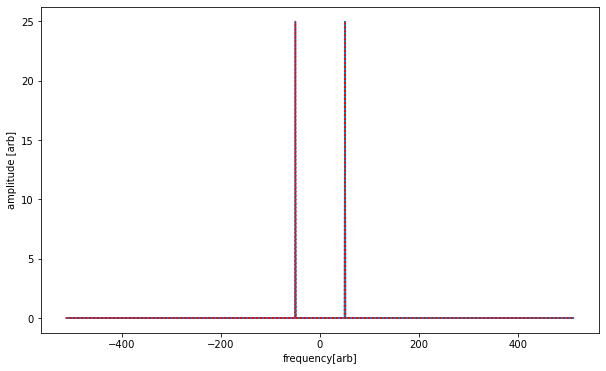

La diferencia máxima entre los resultados: 6.63843736638982e-12 <- Esto debería ser cero dentro del margen de error de redondeo.


In [9]:
ftpl = np.fft.ifft(fn)       ## FFT usando código de numpy

## hacer un gráfico comparando estas funciones
pl.figure(figsize=(10, 6))  
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.plot(freq,np.abs(ftpl))
pl.plot(freq,np.abs(fouriertrans),'r:')
pl.show()
## calcular la diferencia máxima
print("La diferencia máxima entre los resultados:", np.max(np.abs(fouriertrans - ftpl)),
      "<- Esto debería ser cero dentro del margen de error de redondeo.")

Como era de esperar, los dos algoritmos coinciden dentro de los errores de redondeo numérico.

<font color='red'>EJERCICIO: </font> Escribe un código para generar algunas funciones cuya transformada de Fourier conocemos bien, por ejemplo, una gaussiana, una función delta, etc. Utiliza el código anterior y grafica las transformadas de Fourier de estas funciones. ¡Utiliza el código de numpy para verificar que funciona bien!

In [10]:
# Tu código va aquí

# Convoluciones

La <a href="https://es.wikipedia.org/wiki/Convoluci%C3%B3n">convolución</a> de dos funciones discretamente muestreadas (con $N$ muestras) $f_i$ y $g_i$ se define como $$ (f * g)_k = \sum_{i=0}^{N-1} f_k g_{i-k} $$

En otras palabras, para calcular la convolución: (1) se multiplican dos funciones y se suman para obtener un número y (2) se repite el procedimiento para todos los desplazamientos posibles.

En el siguiente ejemplo calculamos la convolución de una gaussiana con dos funciones delta.


/var/folders/x6/1c1sz3rn4kj8kvd0rzmjjbcm0000gn/T/ipykernel_6261/3678205666.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  conv[i] = np.sum(f *np.roll(g,i))
/Users/cvargas/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/x6/1c1sz3rn4kj8kvd0rzmjjbcm0000gn/T/ipykernel_6261/3678205666.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  pl.plot(np.real(t),conv,"r", label='convolución',color="red")


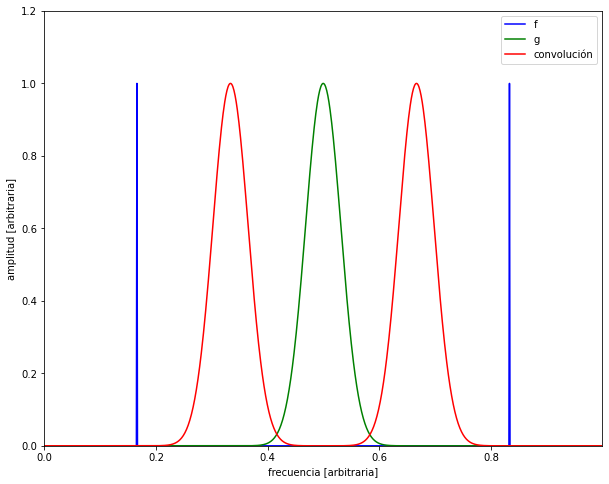

In [11]:
from scipy.stats import chi2
import numpy as np
f = np.zeros(N)
f[int(N/6)] = 1.
f[int(N*5/6)] = 1.


gauss=True

if chi2:
    
    g = chi2.pdf(np.real(t), 55)
    g = g/np.max(g)
if gauss:
    g = np.exp(-5 * ((t-np.mean(t))/.1)**2.)

def convolucion(f,g):
    g=g[::-1]
    N = np.size(f)
    conv = np.zeros(N)
    
    i = 0
    while (i <N):
        conv[i] = np.sum(f *np.roll(g,i))
        i+=1
    return(conv)

conv = convolucion(f,g)

plt.figure(figsize=(10,8))

pl.plot(np.real(t),f, label='f',color="blue")
pl.plot(np.real(t),g, label='g',color="green")
pl.plot(np.real(t),conv,"r", label='convolución',color="red")
plt.legend(loc='best')
pl.axis([np.min(np.real(t)),np.max(np.real(t)),0,1.2])

pl.xlabel("frecuencia [arbitraria]")
pl.ylabel("amplitud [arbitraria]")
#pl.title("f (azul), g(verde), convolución (rojo)")
pl.show()

Si seleccionaste "gauss" como verdadero, ten en cuenta que, dado que la curva gaussiana verde está centrada entre las funciones delta: la convolución alcanza su máximo a mitad de camino entre la gaussiana y las deltas. Para nuestras aplicaciones, a menudo queremos centrar los resultados de manera que la convolución alcance su máximo directamente en las funciones delta. Para hacer esto, debemos centrar el kernel de convolución (nuevamente, una gaussiana o $\chi^2$ según lo que hayas elegido anteriormente) en la frecuencia cero, que siguiendo la convención de la FFT es el borde izquierdo del arreglo. Haremos esto en el siguiente ejemplo.


/var/folders/x6/1c1sz3rn4kj8kvd0rzmjjbcm0000gn/T/ipykernel_6261/3678205666.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  conv[i] = np.sum(f *np.roll(g,i))
/Users/cvargas/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


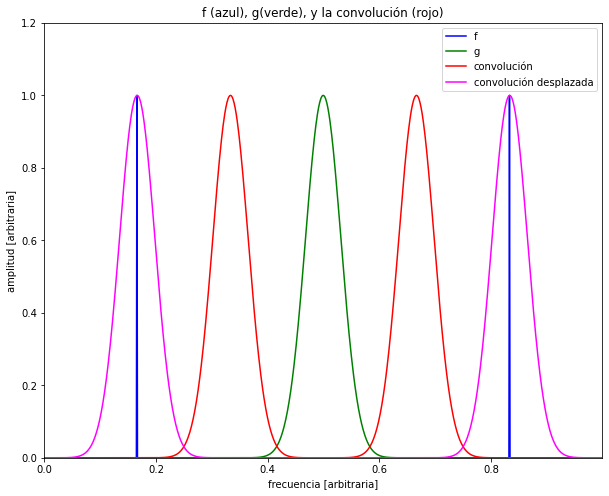

In [12]:
conv_prev = convolucion(f,g)
# Roll the function g by the Nyquist frequency to shift it
conv = convolucion(f,np.roll(g,int(N/2)))

pl.figure(figsize=(10,8))

pl.plot(np.real(t),f, label='f',color="blue")
pl.plot(np.real(t),g, label='g',color="green")
pl.plot(np.real(t),conv_prev, label='convolución',color="red")
pl.plot(np.real(t),conv, label='convolución desplazada',color="magenta")
#plt.legend(loc='best')
plt.legend()
pl.axis([np.min(np.real(t)),np.max(np.real(t)),0,1.2])



pl.xlabel("frecuencia [arbitraria]")
pl.ylabel("amplitud [arbitraria]")
pl.title("f (azul), g(verde), y la convolución (rojo)")
pl.show()

Dada la necesidad frecuente de centrar las convoluciones de esta manera, numpy tiene una función incorporada llamada "fftshift" para hacer esto, en lugar de usar la función "roll". La función fftshift calcula la frecuencia de Nyquist si la longitud del arreglo es par y realiza un desplazamiento en consecuencia, de modo que el componente de frecuencia cero se encuentre en el centro del espectro.

La velocidad es un aspecto importante en las convoluciones. Afortunadamente, existe una forma de acelerar enormemente este algoritmo utilizando la FFT (Transformada de Fourier Rápida) con el teorema de convolución:

$$(f * g) = iFFT(FFT(f) \times FFT(g)). $$

En otras palabras, la convolución es la transformada inversa de Fourier del producto de las transformadas de Fourier de las dos funciones.

/Users/cvargas/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/cvargas/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/cvargas/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/cvargas/miniforge3/lib/python3.9/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


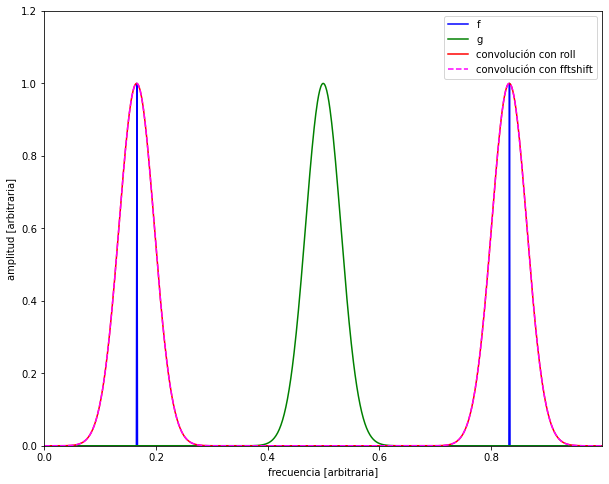

In [13]:
def fft_convolucionar(f,g):
    
    FFTf = fourier(f)
    FFTg = fourier(g)
    conv = inv_fourier(FFTf*FFTg)
    return conv

conv = fft_convolucionar(f,np.roll(g,int(N/2)))
npconv = fft_convolucionar(f,np.fft.fftshift(g))

pl.figure(figsize=(10,8))

pl.plot(np.real(t),f, label='f',color="blue")
pl.plot(np.real(t),g, label='g',color="green")
pl.plot(np.real(t),conv, label="convolución con roll",color="red")
pl.plot(np.real(t),npconv, "--",label="convolución con fftshift",color="magenta")




plt.legend(loc='best')
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frecuencia [arbitraria]")
pl.ylabel("amplitud [arbitraria]")
pl.show()

Como era de esperar, los resultados son los mismos para este método que para el método directo.

## Centrado y las FFTs

El centrado de la entrada a la FFT está relacionado con la fase en la salida. En el siguiente ejemplo (que sirve como una advertencia), observamos cómo el desplazamiento de la entrada puede resultar en una fuerte modulación de fase (por ejemplo, rotación entre la parte real e imaginaria) en la salida.

(0.45, 0.55, -100.0, 100.0)

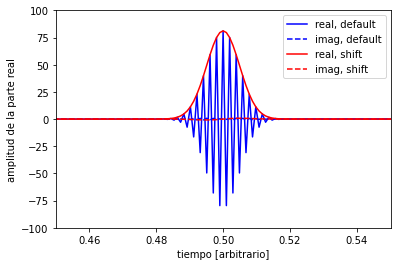

In [14]:
g = np.exp(-5 * ((t-np.mean(t))/.1)**2.)

## centrado por defecto
pl.plot(np.real(t),np.fft.fftshift(np.real(np.fft.fft(g))),"b", label='real, default')
pl.plot(np.real(t),np.fft.fftshift(np.imag(np.fft.fft(g))),"b--", label='imag, default')
## con un desplazamiento en la entrada
pl.plot(np.real(t),np.fft.fftshift(np.real(np.fft.fft(np.fft.fftshift(g)))),"r",label='real, shift')
pl.plot(np.real(t),np.fft.fftshift(np.imag(np.fft.fft(np.fft.fftshift(g)))),"r--", label='imag, shift')

pl.xlabel("tiempo [arbitrario]")
pl.ylabel("amplitud de la parte real")
plt.legend(loc='best')
#pl.title("FFT results for default centering (blue) and shifted(red). Real part is continuous, imaginary part is dashed")
pl.axis([0.45,.55,-100,100])

Es evidente que ambos centrados proporcionan la misma información, pero la fase se ha rotado para hacer que el resultado sea puramente real mediante el desplazamiento de la entrada antes de la FFT. Si observas oscilaciones en tus resultados de FFT, esto es casi siempre lo que está ocurriendo.

# FFTs bidimensionales

FFT2 implementa la transformada de Fourier en dos dimensiones. Utilizaremos ampliamente la funcionalidad fft2 de Numpy en este curso, así que aquí construimos algunos ejemplos. Primero generaremos una gaussiana en 2D y visualizaremos su transformada de Fourier en 2D.

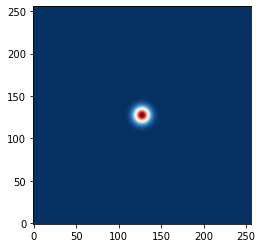

In [15]:
## Primero, creemos un sistema de coordenadas
N = 256
x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N)) ## creemos un arreglo 2D de coordenadas x e y
r = np.sqrt(x**2 + y**2)  ## calculemos la coordenada radial de cada píxel

## ahora creemos una gaussiana en 2D
gaussian_2d = np.exp(-.5 *(r/.05)**2)

## ahora grafiquemos la gaussiana.
pl.imshow(gaussian_2d, interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)

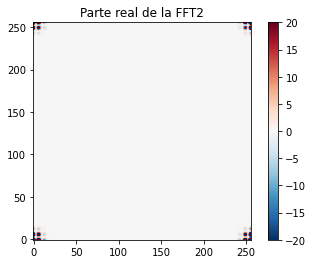

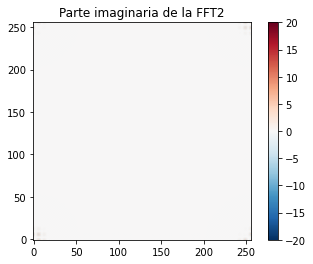

In [16]:
fft_ga_2d = np.fft.fft2(gaussian_2d)  ## Calculemos la transformada de Fourier 2D de nuestra gaussiana
im = pl.imshow(np.real(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
pl.title('Parte real de la FFT2')
pl.show()
im = pl.imshow(np.imag(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
pl.title('Parte imaginaria de la FFT2')
pl.show()

A partir de este ejemplo, podemos observar que:

    (1) La transformada de Fourier de una gaussiana es una gaussiana.
    (2) La transformada de Fourier es una cantidad compleja.
    (3) Cuanto más pequeña es la gaussiana, mayor es su transformada de Fourier (por ejemplo, el principio de incertidumbre).
    (4) El resultado está centrado en la frecuencia cero, tal como esperaríamos del ejemplo en 1D.

Dependiendo de la aplicación, a menudo debemos considerar cuidadosamente el centrado de los arreglos de entrada y salida. Observa que los resultados oscilan en la escala de píxeles entre valores positivos y negativos. Esto se debe a las opciones de centrado de la matriz de entrada. Debemos corregir esto con desplazamientos, al igual que en el ejemplo en 1D.

Ilustraremos esto con los siguientes ejemplos. Primero, desplazamos el arreglo de entrada utilizando fftshift:

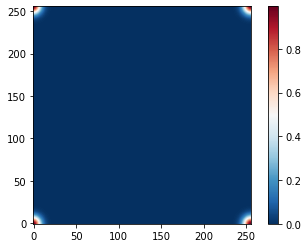

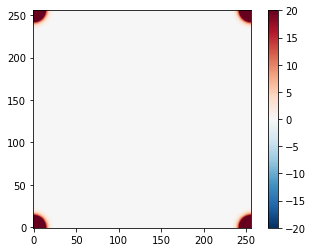

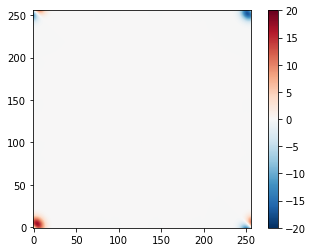

In [17]:
pl.imshow(np.fft.fftshift(gaussian_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
plt.colorbar()
pl.show()
fft_ga_2d = np.fft.fft2(np.fft.fftshift(gaussian_2d))  

im = pl.imshow(np.real(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
pl.show()
im = pl.imshow(np.imag(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
pl.show()


Observa que el desplazamiento del arreglo de entrada no cambió el centrado del arreglo de salida, pero eliminó las oscilaciones. A continuación, también desplazaremos el arreglo de salida:

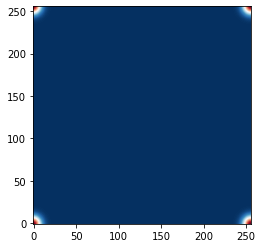

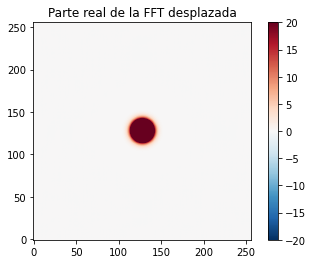

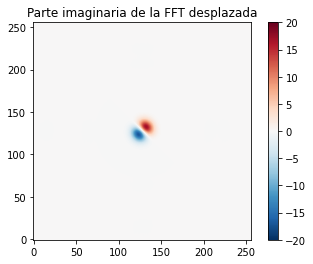

In [18]:
pl.imshow(np.fft.fftshift(gaussian_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
pl.show()
fft_ga_2d = np.fft.fft2(np.fft.fftshift(gaussian_2d))  
im = pl.imshow(np.fft.fftshift(np.real(fft_ga_2d)), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
plt.title('Parte real de la FFT desplazada')
pl.show()
im = pl.imshow(np.fft.fftshift(np.imag(fft_ga_2d)), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
plt.title('Parte imaginaria de la FFT desplazada')
pl.show()



Dependiendo de la aplicación, desplazaremos los arreglos de entrada y salida para dar sentido a los resultados.

## Convolución 2D

En el ejemplo final, presentamos una convolución en 2D, algo que utilizaremos mucho en el análisis de CMB

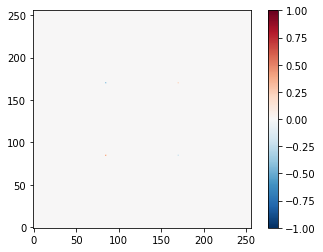

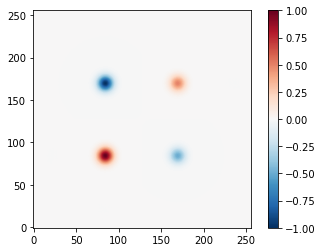

In [19]:
input = np.zeros([N,N])
input[int(N/3),int(N/3)] = 1
input[int(N*2/3),int(N*2/3)] = .5
input[int(N/3),int(N*2/3)] = -.5
input[int(N*2/3),int(N/3)] = -1

im = pl.imshow(input, interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-1.,1.)
plt.colorbar()
pl.show()

convolucion = np.fft.ifft2(np.fft.fft2(np.fft.fftshift(gaussian_2d)) * np.fft.fft2(input))

im = pl.imshow(np.real(convolucion), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-1.,1.)
plt.colorbar()
pl.show()

En este caso, centrar el kernel en la frecuencia cero permite que los peaks de la convolución coincidan con los peaks del mapa de entrada. Utilizaremos este método para generar realizaciones de fuentes puntuales.